In [4]:
import tensorflow as tf 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


2


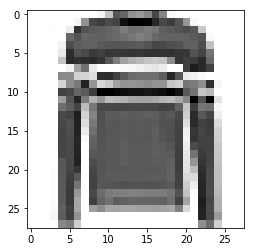

In [5]:
import matplotlib.pyplot as plt
image_index = 5 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')


In [6]:
x_train.shape


(60000, 28, 28)

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128,activation=tf.nn.sigmoid))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.4815 - accuracy: 0.8281
Epoch 2/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.3268 - accuracy: 0.8837
Epoch 3/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.2798 - accuracy: 0.8985
Epoch 4/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2457 - accuracy: 0.9116
Epoch 5/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.2235 - accuracy: 0.9182
Epoch 6/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.2009 - accuracy: 0.9271
Epoch 7/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1840 - accuracy: 0.9333
Epoch 8/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1684 - accuracy: 0.9388
Epoch 9/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1551 - accuracy: 0.9429
Epoch 10/10
60000/60000 [==============================

In [10]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 4s 393us/step


[0.2550588166356087, 0.9125999808311462]